In [13]:
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import tensorflow as tf

In [14]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\aaaya\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [26]:
model = Sequential()

model.add(Conv2D(2,(3,3), activation='relu', input_shape=(408,615,3)))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(4,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(256, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(Dense(units=408, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])





train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('J:/KJSCE_MP/Backup]/MiniProject/dataset/train',target_size = (408,615),batch_size = 80, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('J:/KJSCE_MP/Backup]/MiniProject/dataset/val', target_size = (408,615), batch_size = 80, class_mode = 'categorical')

labels = (training_set.class_indices)
print(labels)


hist = model.fit(training_set, steps_per_epoch = 30, epochs = 45, validation_data=valid_set)

Found 3488 images belonging to 4 classes.
Found 686 images belonging to 4 classes.
{'Maize - Blight': 0, 'Maize - Common_Rust': 1, 'Maize - Gray_Leaf_Spot': 2, 'Maize - Healthy': 3}
Epoch 1/45
30/30 [==============================] - 211s 7s/step - loss: 1.3595 - accuracy: 0.2960 - val_loss: 1.4467 - val_accuracy: 0.2259
Epoch 2/45
30/30 [==============================] - 213s 7s/step - loss: 1.3005 - accuracy: 0.3675 - val_loss: 1.4194 - val_accuracy: 0.3615
Epoch 3/45
30/30 [==============================] - 208s 7s/step - loss: 1.2502 - accuracy: 0.4329 - val_loss: 1.4054 - val_accuracy: 0.3732
Epoch 4/45
30/30 [==============================] - 208s 7s/step - loss: 1.1892 - accuracy: 0.4637 - val_loss: 1.3191 - val_accuracy: 0.4155
Epoch 5/45
30/30 [==============================] - 210s 7s/step - loss: 1.1747 - accuracy: 0.4814 - val_loss: 1.3549 - val_accuracy: 0.4052
Epoch 6/45
30/30 [==============================] - 209s 7s/step - loss: 1.1615 - accuracy: 0.4810 - val_loss: 1.

In [16]:
img = "J:/KJSCE_MP/Backup]/MiniProject/dataset/test/Corn_Health (61).jpg"

test_img = load_img(img, target_size=(615,408))




from PIL import Image 

im = Image.open(img)
im.show()



test_img = img_to_array(test_img)/255
test_img = np.expand_dims(test_img, axis = 0)


result = model.predict(test_img)

pred = np.argmax(result, axis=1)
print(pred)

1/1 [==============================] - 0s 207ms/step
[3]


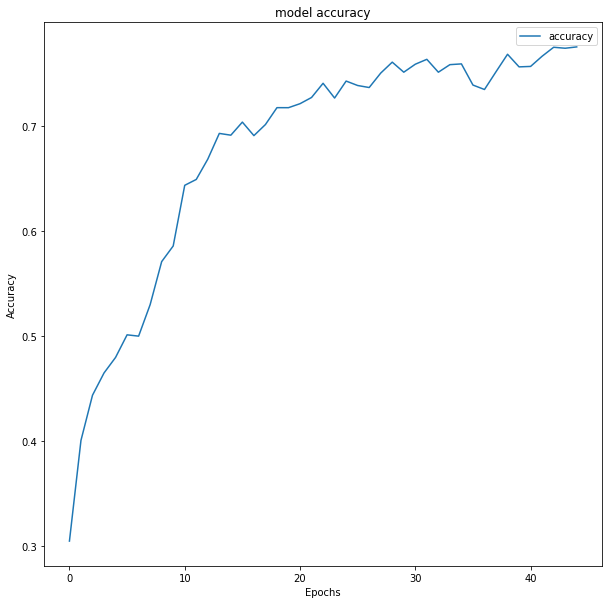

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy"])
plt.show()

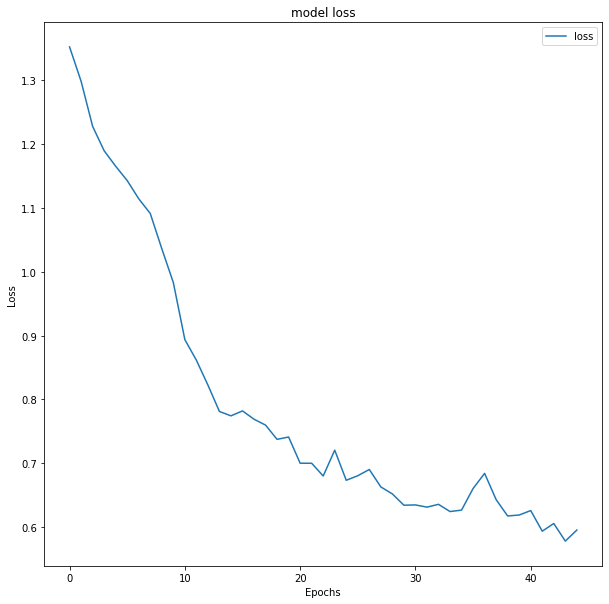

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

In [19]:
hist.history

{'loss': [1.3523662090301514,
  1.2985302209854126,
  1.227936863899231,
  1.1896605491638184,
  1.1653913259506226,
  1.1429775953292847,
  1.1144534349441528,
  1.0914106369018555,
  1.036271095275879,
  0.9832152128219604,
  0.8937780857086182,
  0.861586332321167,
  0.8226299285888672,
  0.7812238335609436,
  0.7743830680847168,
  0.7821200489997864,
  0.7690852284431458,
  0.7598722577095032,
  0.7375468015670776,
  0.7412455081939697,
  0.700164258480072,
  0.7000912427902222,
  0.6801496744155884,
  0.7205962538719177,
  0.6734426617622375,
  0.6805809736251831,
  0.6903626918792725,
  0.6629945039749146,
  0.652070939540863,
  0.6343798041343689,
  0.6348203420639038,
  0.6313631534576416,
  0.6357746124267578,
  0.6244426369667053,
  0.6266881823539734,
  0.6604982018470764,
  0.6842835545539856,
  0.6431299448013306,
  0.6175011992454529,
  0.6190422177314758,
  0.6259794235229492,
  0.5936862230300903,
  0.605731725692749,
  0.5781672596931458,
  0.5954465866088867],
 'accur

'''Saving Model'''

In [27]:
model.save('J:/KJSCE_MP/Backup]/FinalBuildv2.0/backend_model.h5')

In [28]:
path="J:/KJSCE_MP/Backup]/FinalBuildv2.0/backend_model.h5"
model1 = tf.keras.models.load_model(path)

In [29]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 406, 613, 2)       56        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 203, 306, 2)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 203, 306, 4)       76        
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 101, 153, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 101, 153, 8)       296       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 76, 8)       

In [30]:
classifier_json=model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    model.save_weights("my_model_weights.h5")
    model.save("model.h5")
    print("Saved model to disk")

Saved model to disk
